In [13]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder

import optuna

In [2]:
df=pd.read_csv('train_spam.csv')
df.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


In [3]:
le = LabelEncoder()
le.fit(['ham', 'spam'])
df.text_type = le.transform(df.text_type)
df.head()

,text_type,text
0,0,make sure alex knows his birthday is over in f...
1,0,a resume for john lavorato thanks vince i will...
2,1,plzz visit my website moviesgodml to get all m...
3,1,urgent your mobile number has been awarded wit...
4,0,overview of hr associates analyst project per ...


In [4]:
X_train, X_val, y_train, y_val = train_test_split(df.text, df.text_type, test_size=0.2, random_state=42, stratify=df.text_type)

In [5]:
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in stopwords.words('english')]

In [6]:
pipe = Pipeline([
    ('cv',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer())])
X_train_tok = pipe.fit_transform(X_train)

In [7]:
X_val_tok = pipe.transform(X_val)

In [ ]:
study = optuna.create_study(study_name="my_first_study", direction="maximize")
def objective(trial):
    params = {
          'alpha': trial.suggest_float('alpha', 1e-7, 1000, log=True),
             }

    model = MultinomialNB(**params)
    model.fit(X_train_tok, y_train)
    
    y_pred_proba = model.predict_proba(X_val_tok)[:,1:]
    sc = roc_auc_score(y_val, y_pred_proba)
    
    return sc

study.optimize(objective, n_trials=1000)

In [10]:
study = optuna.create_study(study_name="my_first_study", direction="maximize")
def objective(trial, train_pool=X_train_tok, val_pool=X_val_tok):
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)
    max_features = trial.suggest_categorical(name="max_features", choices=['log2', 'sqrt']) 
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    model = RandomForestClassifier(**params)
    model.fit(train_pool,y_train)
    
    y_pred_proba = model.predict_proba(val_pool)[:,1]
    sc = roc_auc_score(y_val, y_pred_proba)
    
    return sc

study.optimize(objective, n_trials=100)

[I 2024-05-03 21:21:48,870] A new study created in memory with name: my_first_study
[I 2024-05-03 21:21:53,822] Trial 0 finished with value: 0.9782094481309827 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9782094481309827.
[I 2024-05-03 21:21:58,314] Trial 1 finished with value: 0.9741008361322223 and parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 70, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9782094481309827.
[I 2024-05-03 21:22:00,850] Trial 2 finished with value: 0.9759321977063912 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9782094481309827.
[I 2024-05-03 21:22:01,725] Trial 3 finished with value: 0.9681266505590829 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 30, 'min_s

[I 2024-05-03 21:23:17,555] Trial 33 finished with value: 0.9840016983652555 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 90, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.9847872149528645.
[I 2024-05-03 21:23:19,357] Trial 34 finished with value: 0.9837372917146239 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 90, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 22 with value: 0.9847872149528645.
[I 2024-05-03 21:23:20,447] Trial 35 finished with value: 0.9750879996084878 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 90, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 22 with value: 0.9847872149528645.
[I 2024-05-03 21:23:21,452] Trial 36 finished with value: 0.9755327556112211 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 22 with value: 0.984

[I 2024-05-03 21:25:03,532] Trial 66 finished with value: 0.9877743077394343 and parameters: {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 110, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 46 with value: 0.9893068240932235.
[I 2024-05-03 21:25:06,809] Trial 67 finished with value: 0.986702860395101 and parameters: {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 110, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 46 with value: 0.9893068240932235.
[I 2024-05-03 21:25:07,464] Trial 68 finished with value: 0.9765500528360161 and parameters: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 46 with value: 0.9893068240932235.
[I 2024-05-03 21:25:08,026] Trial 69 finished with value: 0.9672285289111793 and parameters: {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 110, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 46 with value: 0.9893

[I 2024-05-03 21:26:59,875] Trial 99 finished with value: 0.9871337956560275 and parameters: {'n_estimators': 400, 'max_features': 'log2', 'max_depth': 90, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 94 with value: 0.9895415501344011.


In [27]:
study = optuna.create_study(study_name="my_first_study", direction="maximize")
def objective(trial):
    params = {
        'loss': 'modified_huber',
        'penalty': trial.suggest_categorical("penalty", ['l2', 'l1', 'elasticnet']),
        'alpha': trial.suggest_float('alpha', 1e-7, 1000, log=True),
        'n_jobs': -1,
        'random_state': 42,
        
             }
    if params['penalty'] == 'elasticnet':
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 1e-7, 1, log=True)

    model = SGDClassifier(**params)
    model.fit(X_train_tok, y_train)
    
    y_pred_proba = model.predict_proba(X_val_tok)[:,1:]
    sc = roc_auc_score(y_val, y_pred_proba)
    
    return sc

study.optimize(objective, n_trials=1000)

[I 2024-05-03 21:52:09,086] A new study created in memory with name: my_first_study
[I 2024-05-03 21:52:09,106] Trial 0 finished with value: 0.9819981439423463 and parameters: {'penalty': 'l2', 'alpha': 0.00039247693265917575}. Best is trial 0 with value: 0.9819981439423463.
[I 2024-05-03 21:52:09,154] Trial 1 finished with value: 0.9809434627438115 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00048348049137436367, 'l1_ratio': 0.004039289848526778}. Best is trial 0 with value: 0.9819981439423463.
[I 2024-05-03 21:52:09,182] Trial 2 finished with value: 0.5 and parameters: {'penalty': 'l1', 'alpha': 1.6176824143879258}. Best is trial 0 with value: 0.9819981439423463.
[I 2024-05-03 21:52:09,203] Trial 3 finished with value: 0.5 and parameters: {'penalty': 'l1', 'alpha': 141.5020547177898}. Best is trial 0 with value: 0.9819981439423463.
[I 2024-05-03 21:52:09,219] Trial 4 finished with value: 0.9607812661430796 and parameters: {'penalty': 'l2', 'alpha': 0.007059946248048241}. Bes

[I 2024-05-03 21:52:10,719] Trial 38 finished with value: 0.9507578297900878 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0160699136085576, 'l1_ratio': 3.0876756838454016e-05}. Best is trial 37 with value: 0.9846091312961408.
[I 2024-05-03 21:52:10,774] Trial 39 finished with value: 0.9730085443904102 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0019123143618309485, 'l1_ratio': 2.1378400636524987e-05}. Best is trial 37 with value: 0.9846091312961408.
[I 2024-05-03 21:52:10,894] Trial 40 finished with value: 0.9140868703859114 and parameters: {'penalty': 'elasticnet', 'alpha': 1.0940007185569433e-07, 'l1_ratio': 0.0015627631846732864}. Best is trial 37 with value: 0.9846091312961408.
[I 2024-05-03 21:52:10,945] Trial 41 finished with value: 0.984776792754125 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00011943406841765756, 'l1_ratio': 0.00046908728499520325}. Best is trial 41 with value: 0.984776792754125.
[I 2024-05-03 21:52:10,985] Trial 42 finished with value

[I 2024-05-03 21:52:12,621] Trial 74 finished with value: 0.9834989405608413 and parameters: {'penalty': 'elasticnet', 'alpha': 4.591814794594404e-05, 'l1_ratio': 1.03479198519136e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:12,671] Trial 75 finished with value: 0.9828840308352078 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0002958538590423837, 'l1_ratio': 5.988463737328752e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:12,730] Trial 76 finished with value: 0.9783021150719493 and parameters: {'penalty': 'elasticnet', 'alpha': 1.5021039548858845e-05, 'l1_ratio': 2.1975707281247993e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:12,785] Trial 77 finished with value: 0.9802111899975893 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0005884025599737099, 'l1_ratio': 7.824535097364686e-06}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:12,836] Trial 78 finished with valu

[I 2024-05-03 21:52:14,428] Trial 110 finished with value: 0.9616531057245966 and parameters: {'penalty': 'elasticnet', 'alpha': 5.645122709976272e-06, 'l1_ratio': 7.211365656813135e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:14,477] Trial 111 finished with value: 0.9847185643829062 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00012627129474063274, 'l1_ratio': 4.385195997670747e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:14,525] Trial 112 finished with value: 0.9844996982093758 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001448014433108904, 'l1_ratio': 4.4199370008741764e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:14,574] Trial 113 finished with value: 0.9813453971038977 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00046468216963574936, 'l1_ratio': 3.814482391885503e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:14,617] Trial 114 finished wi

[I 2024-05-03 21:52:16,024] Trial 145 finished with value: 0.9832764492747057 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00024051909336848758, 'l1_ratio': 6.43890698454462e-06}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:16,068] Trial 146 finished with value: 0.982114147545708 and parameters: {'penalty': 'elasticnet', 'alpha': 3.732389716511909e-05, 'l1_ratio': 1.2090674118548514e-05}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:16,118] Trial 147 finished with value: 0.9802775748721695 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0005793511290835687, 'l1_ratio': 0.00012508348145529773}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:16,137] Trial 148 finished with value: 0.984432633626182 and parameters: {'penalty': 'l2', 'alpha': 0.000149252939561861}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:16,176] Trial 149 finished with value: 0.9839831196631545 and parameters: {'

[I 2024-05-03 21:52:17,620] Trial 181 finished with value: 0.9847024779457212 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00012800632975920142, 'l1_ratio': 3.093989899300801e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:17,663] Trial 182 finished with value: 0.973049326907217 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00012994684559412505, 'l1_ratio': 0.8319181477391148}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:17,719] Trial 183 finished with value: 0.9831831026251253 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00023731426838243585, 'l1_ratio': 0.0042520815641862615}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:17,758] Trial 184 finished with value: 0.9843372478507614 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00010324211137548471, 'l1_ratio': 3.8740512680703086e-07}. Best is trial 71 with value: 0.9848035279595873.
[I 2024-05-03 21:52:17,806] Trial 185 finished with

[I 2024-05-03 21:52:19,226] Trial 216 finished with value: 0.982754433059577 and parameters: {'penalty': 'elasticnet', 'alpha': 0.000287267439609857, 'l1_ratio': 1.1825914363265126e-05}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:19,241] Trial 217 finished with value: 0.9839763225770202 and parameters: {'penalty': 'l2', 'alpha': 7.619163639187746e-05}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:19,296] Trial 218 finished with value: 0.984162562737105 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00017473190792495672, 'l1_ratio': 3.017036645072691e-07}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:19,346] Trial 219 finished with value: 0.9847140329921499 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00012689397641244134, 'l1_ratio': 5.638556749172291e-07}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:19,396] Trial 220 finished with value: 0.9847933323303856 and parameter

[I 2024-05-03 21:52:21,005] Trial 251 finished with value: 0.9836480233167243 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00021464938089577995, 'l1_ratio': 3.1631217389628664e-07}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:21,051] Trial 252 finished with value: 0.9844052187121062 and parameters: {'penalty': 'elasticnet', 'alpha': 9.56367506910867e-05, 'l1_ratio': 1.5459138079866226e-06}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:21,092] Trial 253 finished with value: 0.9839634081133647 and parameters: {'penalty': 'elasticnet', 'alpha': 6.594308564914618e-05, 'l1_ratio': 4.5884688774454603e-07}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:21,144] Trial 254 finished with value: 0.9846351867929899 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001328952811993096, 'l1_ratio': 7.931942330706572e-07}. Best is trial 192 with value: 0.9848105516152597.
[I 2024-05-03 21:52:21,165] Trial 255 finishe

[I 2024-05-03 21:52:22,662] Trial 287 finished with value: 0.9823146615866756 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0003582008938514881, 'l1_ratio': 0.0007052610327180238}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:22,711] Trial 288 finished with value: 0.9844555171495014 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00010915859123235325, 'l1_ratio': 2.264588018541655e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:22,760] Trial 289 finished with value: 0.9835945529057997 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0002170815343759307, 'l1_ratio': 0.0008366818864023234}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:22,802] Trial 290 finished with value: 0.9839568375967679 and parameters: {'penalty': 'elasticnet', 'alpha': 6.733311992746186e-05, 'l1_ratio': 0.0015207846064622657}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:22,855] Trial 291 finished 

[I 2024-05-03 21:52:24,315] Trial 322 finished with value: 0.9839117502587422 and parameters: {'penalty': 'l2', 'alpha': 5.362473708487459e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:24,368] Trial 323 finished with value: 0.9805680370196499 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0005346194410556461, 'l1_ratio': 0.0019883504661326297}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:24,410] Trial 324 finished with value: 0.9842774334927779 and parameters: {'penalty': 'elasticnet', 'alpha': 8.455538027514104e-05, 'l1_ratio': 0.002162414742842335}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:24,466] Trial 325 finished with value: 0.9844106563810138 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001457010754413803, 'l1_ratio': 0.003283062462632521}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:24,513] Trial 326 finished with value: 0.9831056158431922 and parameters:

[I 2024-05-03 21:52:26,012] Trial 358 finished with value: 0.978139891282873 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0008621335352574817, 'l1_ratio': 2.206168670643015e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:26,053] Trial 359 finished with value: 0.9843703270032825 and parameters: {'penalty': 'elasticnet', 'alpha': 9.95335297037404e-05, 'l1_ratio': 5.206289076018603e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:26,104] Trial 360 finished with value: 0.984112037730172 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00017844674335758964, 'l1_ratio': 2.6794362279739277e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:26,147] Trial 361 finished with value: 0.9822904186461291 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00036356478899079753, 'l1_ratio': 3.035777662448333e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:26,203] Trial 362 finished w

[I 2024-05-03 21:52:27,668] Trial 393 finished with value: 0.9843438183673581 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00015744239785790451, 'l1_ratio': 4.827518125909873e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:27,714] Trial 394 finished with value: 0.9830859042934023 and parameters: {'penalty': 'elasticnet', 'alpha': 4.068301055310058e-05, 'l1_ratio': 1.1881262267733516e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:27,764] Trial 395 finished with value: 0.9683559389313532 and parameters: {'penalty': 'elasticnet', 'alpha': 0.003366641779696562, 'l1_ratio': 3.5875539995934116e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:27,825] Trial 396 finished with value: 0.962107604217456 and parameters: {'penalty': 'l1', 'alpha': 0.00010748176008960834}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:27,888] Trial 397 finished with value: 0.9825883575883577 and paramet

[I 2024-05-03 21:52:29,448] Trial 428 finished with value: 0.9838261069734479 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00019903252704070484, 'l1_ratio': 1.000984439074257e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:29,490] Trial 429 finished with value: 0.9842833243007612 and parameters: {'penalty': 'elasticnet', 'alpha': 8.671341065374774e-05, 'l1_ratio': 3.0982576451928927e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:29,536] Trial 430 finished with value: 0.9839267038482383 and parameters: {'penalty': 'elasticnet', 'alpha': 5.65492990054882e-05, 'l1_ratio': 7.260103661368156e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:29,592] Trial 431 finished with value: 0.984600295084166 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00013609378334592415, 'l1_ratio': 1.9652717678844233e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:29,643] Trial 432 finished

[I 2024-05-03 21:52:31,162] Trial 463 finished with value: 0.9844514388978208 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001471193212159171, 'l1_ratio': 0.0009372495131885264}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:31,191] Trial 464 finished with value: 0.9521392242621536 and parameters: {'penalty': 'l1', 'alpha': 0.0004895184747645844}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:31,238] Trial 465 finished with value: 0.9844260631095855 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00011448934218853705, 'l1_ratio': 5.781590261804591e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:31,293] Trial 466 finished with value: 0.9839162816494987 and parameters: {'penalty': 'elasticnet', 'alpha': 5.399262267035085e-05, 'l1_ratio': 9.674266003092204e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:31,329] Trial 467 finished with value: 0.8306283951445241 and paramete

[I 2024-05-03 21:52:32,893] Trial 498 finished with value: 0.9827947624373081 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00028353524011364215, 'l1_ratio': 2.9007323125941584e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:32,945] Trial 499 finished with value: 0.9845370821831153 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00014171468914972584, 'l1_ratio': 3.922216479471035e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:32,988] Trial 500 finished with value: 0.9842733552410974 and parameters: {'penalty': 'elasticnet', 'alpha': 8.801118081594544e-05, 'l1_ratio': 7.847505786192483e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:33,040] Trial 501 finished with value: 0.9812751605471745 and parameters: {'penalty': 'elasticnet', 'alpha': 3.053447109476831e-05, 'l1_ratio': 2.1754571921236e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:33,082] Trial 502 finished 

[I 2024-05-03 21:52:34,417] Trial 535 finished with value: 0.9829753383589478 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0002658518232465455, 'l1_ratio': 1.7879497870649775e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:34,478] Trial 536 finished with value: 0.9846893369125278 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00012911740742115835, 'l1_ratio': 3.1389755957426116e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:34,524] Trial 537 finished with value: 0.9839674863650452 and parameters: {'penalty': 'elasticnet', 'alpha': 7.794620156091251e-05, 'l1_ratio': 0.0011912168343537833}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:34,584] Trial 538 finished with value: 0.9780377084213178 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0008576647246151253, 'l1_ratio': 0.0018506510826771232}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:34,606] Trial 539 finishe

[I 2024-05-03 21:52:36,212] Trial 571 finished with value: 0.9842420886448785 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00016712285730636345, 'l1_ratio': 0.0001587732938810088}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:36,255] Trial 572 finished with value: 0.9842928402213494 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001067656408016533, 'l1_ratio': 0.0014642179730677543}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:36,307] Trial 573 finished with value: 0.9834540797923536 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00022853691908787443, 'l1_ratio': 0.0005041947242364728}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:36,354] Trial 574 finished with value: 0.9816456017415041 and parameters: {'penalty': 'elasticnet', 'alpha': 3.241297624641834e-05, 'l1_ratio': 3.2498336297141615e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:36,413] Trial 575 finishe

[I 2024-05-03 21:52:37,920] Trial 607 finished with value: 0.9843415526719799 and parameters: {'penalty': 'elasticnet', 'alpha': 9.087364842878207e-05, 'l1_ratio': 0.0008796086492364458}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:37,980] Trial 608 finished with value: 0.9842144471612648 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00016870241848243727, 'l1_ratio': 0.0006476855752217918}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:38,031] Trial 609 finished with value: 0.9818463423520094 and parameters: {'penalty': 'elasticnet', 'alpha': 2.2200335469561046e-05, 'l1_ratio': 0.0017062989637390642}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:38,086] Trial 610 finished with value: 0.9828294275765942 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0002653646071827666, 'l1_ratio': 0.004939764841559853}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:38,134] Trial 611 finished 

[I 2024-05-03 21:52:39,793] Trial 642 finished with value: 0.9847267208862674 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001235434451071411, 'l1_ratio': 0.0008454616980759619}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:39,838] Trial 643 finished with value: 0.9519237566316903 and parameters: {'penalty': 'elasticnet', 'alpha': 0.013864718917302423, 'l1_ratio': 0.0008080972232799604}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:39,891] Trial 644 finished with value: 0.9834427513154628 and parameters: {'penalty': 'elasticnet', 'alpha': 4.396475492266261e-05, 'l1_ratio': 0.000601433151960235}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:39,967] Trial 645 finished with value: 0.97237981392297 and parameters: {'penalty': 'elasticnet', 'alpha': 8.193382722469039e-06, 'l1_ratio': 0.00048510831074933256}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:40,020] Trial 646 finished with

[I 2024-05-03 21:52:41,781] Trial 677 finished with value: 0.9837971060726073 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00019959898521054723, 'l1_ratio': 0.0008063760733074821}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:41,829] Trial 678 finished with value: 0.9839804008287008 and parameters: {'penalty': 'elasticnet', 'alpha': 7.700719788865056e-05, 'l1_ratio': 0.00028206642346388384}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:41,890] Trial 679 finished with value: 0.9781478212166965 and parameters: {'penalty': 'elasticnet', 'alpha': 1.4867136948146457e-05, 'l1_ratio': 0.0010918936578189647}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:41,944] Trial 680 finished with value: 0.983485799527648 and parameters: {'penalty': 'elasticnet', 'alpha': 4.5360847471172915e-05, 'l1_ratio': 0.0004092527288523189}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:42,000] Trial 681 finishe

[I 2024-05-03 21:52:43,676] Trial 712 finished with value: 0.983844459106011 and parameters: {'penalty': 'elasticnet', 'alpha': 6.149530625501414e-05, 'l1_ratio': 1.0482450553642718e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:43,734] Trial 713 finished with value: 0.9847303459988727 and parameters: {'penalty': 'elasticnet', 'alpha': 0.000125509771878643, 'l1_ratio': 8.341914624504609e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:43,788] Trial 714 finished with value: 0.9830369652732337 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0002605634526898536, 'l1_ratio': 4.025979680749104e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:43,834] Trial 715 finished with value: 0.9843537874270221 and parameters: {'penalty': 'elasticnet', 'alpha': 8.888086740609141e-05, 'l1_ratio': 2.1993308744288856e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:43,897] Trial 716 finished w

[I 2024-05-03 21:52:45,521] Trial 747 finished with value: 0.9843585453873162 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00015586819484250783, 'l1_ratio': 1.8077190820942149e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:45,573] Trial 748 finished with value: 0.9368727422345556 and parameters: {'penalty': 'elasticnet', 'alpha': 0.03181172024003516, 'l1_ratio': 0.003093818527586249}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:45,619] Trial 749 finished with value: 0.9839482279543308 and parameters: {'penalty': 'elasticnet', 'alpha': 6.617108340074433e-05, 'l1_ratio': 0.0014102904270192251}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:45,648] Trial 750 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'alpha': 487.4210447045686, 'l1_ratio': 0.0002470567268954659}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:45,703] Trial 751 finished with value: 0.9835077

[I 2024-05-03 21:52:47,446] Trial 782 finished with value: 0.9197055683542169 and parameters: {'penalty': 'l1', 'alpha': 5.301179294035365e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:47,508] Trial 783 finished with value: 0.9835637394486567 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00022028867642691276, 'l1_ratio': 0.00047203594223479327}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:47,561] Trial 784 finished with value: 0.9839742834511798 and parameters: {'penalty': 'elasticnet', 'alpha': 7.200003244175947e-05, 'l1_ratio': 6.362952077548861e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:47,617] Trial 785 finished with value: 0.9843492560362654 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00015705466488241196, 'l1_ratio': 2.986850787988587e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:47,666] Trial 786 finished with value: 0.9817108537683952 and parame

[I 2024-05-03 21:52:49,360] Trial 817 finished with value: 0.9839733771730285 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0001866569147362543, 'l1_ratio': 0.0016850732786299748}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:49,406] Trial 818 finished with value: 0.9842710895457192 and parameters: {'penalty': 'elasticnet', 'alpha': 8.81270881304557e-05, 'l1_ratio': 0.0009211404552737539}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:49,458] Trial 819 finished with value: 0.9817181039936053 and parameters: {'penalty': 'elasticnet', 'alpha': 3.694712982249664e-05, 'l1_ratio': 0.00043184502789501153}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:49,513] Trial 820 finished with value: 0.9844237974142072 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00015080330605051905, 'l1_ratio': 1.0160828470160253e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:49,561] Trial 821 finished

[I 2024-05-03 21:52:51,202] Trial 852 finished with value: 0.9839600095702973 and parameters: {'penalty': 'l2', 'alpha': 7.987238848012327e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:51,259] Trial 853 finished with value: 0.9817298856095719 and parameters: {'penalty': 'elasticnet', 'alpha': 3.610965627826858e-05, 'l1_ratio': 0.0004499428875491507}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:51,324] Trial 854 finished with value: 0.984723775482276 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00011250817668317189, 'l1_ratio': 0.002993787295137853}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:51,378] Trial 855 finished with value: 0.9839291961131542 and parameters: {'penalty': 'elasticnet', 'alpha': 5.684477055496857e-05, 'l1_ratio': 7.086143673847304e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:51,437] Trial 856 finished with value: 0.984065137835844 and parameters:

[I 2024-05-03 21:52:53,134] Trial 887 finished with value: 0.984042934021138 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00018403623590086975, 'l1_ratio': 1.2573023687292735e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:53,181] Trial 888 finished with value: 0.9842941996385763 and parameters: {'penalty': 'elasticnet', 'alpha': 8.210245989750796e-05, 'l1_ratio': 4.911654077229354e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:53,236] Trial 889 finished with value: 0.9842996373074839 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00010777029032508805, 'l1_ratio': 3.7991991855438196e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:53,300] Trial 890 finished with value: 0.9190133984161882 and parameters: {'penalty': 'l1', 'alpha': 1.3696795315920172e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:53,356] Trial 891 finished with value: 0.9830546376971835 and param

[I 2024-05-03 21:52:55,092] Trial 923 finished with value: 0.9806450706625075 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0005382709456148319, 'l1_ratio': 1.4534444339491187e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:55,142] Trial 924 finished with value: 0.9544463818657367 and parameters: {'penalty': 'elasticnet', 'alpha': 0.01208547868835671, 'l1_ratio': 2.6839027935365993e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:55,200] Trial 925 finished with value: 0.9845993888060147 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00013611774372707523, 'l1_ratio': 6.716673164005319e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:55,256] Trial 926 finished with value: 0.9833127004007562 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00023766612880769887, 'l1_ratio': 9.185546005686441e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:55,307] Trial 927 finished

[I 2024-05-03 21:52:57,033] Trial 958 finished with value: 0.9839645409610537 and parameters: {'penalty': 'elasticnet', 'alpha': 6.691947904386769e-05, 'l1_ratio': 6.905248410399042e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:57,091] Trial 959 finished with value: 0.9846415307400485 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00013229775092655406, 'l1_ratio': 3.5071811241940923e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:57,152] Trial 960 finished with value: 0.980661610238768 and parameters: {'penalty': 'elasticnet', 'alpha': 1.9529478956627335e-05, 'l1_ratio': 1.596524784038586e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:57,219] Trial 961 finished with value: 0.9829461108885694 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0002678420118630552, 'l1_ratio': 0.0001591504436186187}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:57,267] Trial 962 finished

[I 2024-05-03 21:52:58,988] Trial 993 finished with value: 0.9842941996385763 and parameters: {'penalty': 'elasticnet', 'alpha': 8.271065805533909e-05, 'l1_ratio': 4.728267453305772e-05}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:59,052] Trial 994 finished with value: 0.984600295084166 and parameters: {'penalty': 'elasticnet', 'alpha': 0.00013610384471071852, 'l1_ratio': 5.929252151751164e-07}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:59,109] Trial 995 finished with value: 0.9826370700389881 and parameters: {'penalty': 'elasticnet', 'alpha': 0.0003097739186391464, 'l1_ratio': 0.0024163672769007983}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:59,169] Trial 996 finished with value: 0.9829986750213429 and parameters: {'penalty': 'elasticnet', 'alpha': 2.8106989495061478e-05, 'l1_ratio': 3.0431466914365953e-06}. Best is trial 269 with value: 0.9848291303173605.
[I 2024-05-03 21:52:59,225] Trial 997 finished

In [28]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Number of finished trials:  1000
Best trial:
  Value:  0.9848291303173605
  Params: 
    penalty: elasticnet
    alpha: 0.00011294591375135237
    l1_ratio: 0.000893485954362624


In [29]:
df_test=pd.read_csv('test_spam.csv')
df_test.head()

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...


In [31]:
X_test_tok = pipe.transform(df_test.text)

<AxesSubplot:>

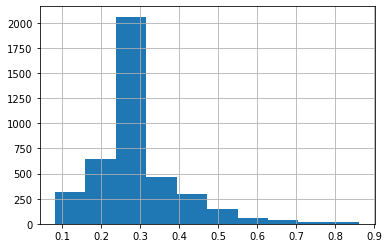

In [47]:
model = RandomForestClassifier(n_estimators = 400,
                              max_features = 'log2',
                              max_depth = 110,
                              min_samples_split = 6,
                              min_samples_leaf = 1)
model.fit(X_train_tok, y_train)
df_test['score'] = model.predict_proba(X_test_tok)[:,1:]
df_test.score.hist()

In [48]:
df_test.iloc[94]

text     join our group 🍆🔞🔞🔞🔞🔞🔞🔞🔞🔞🔞
score                       0.28007
Name: 94, dtype: object

<AxesSubplot:>

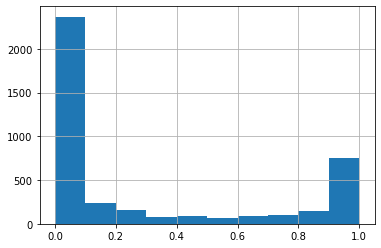

In [42]:
alpha = 0.06551677334710446
model = MultinomialNB(alpha=alpha)
model.fit(X_train_tok, y_train)
df_test['score'] = model.predict_proba(X_test_tok)[:,1:]
df_test.score.hist()

In [43]:
df_test.iloc[94]

text     join our group 🍆🔞🔞🔞🔞🔞🔞🔞🔞🔞🔞
score                      0.461908
Name: 94, dtype: object

<AxesSubplot:>

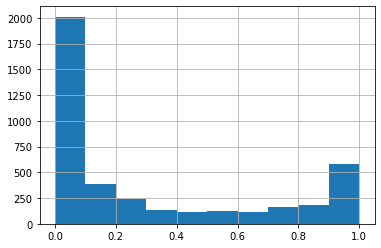

In [49]:
model = SGDClassifier(loss = 'modified_huber',
                      penalty = 'elasticnet',
                      alpha = 0.00011294591375135237,
                      l1_ratio = 0.000893485954362624,
                      n_jobs= -1,
                      random_state = 42)
model.fit(X_train_tok, y_train)
df_test['score'] = model.predict_proba(X_test_tok)[:,1:]
df_test.score.hist()

In [50]:
df_test.iloc[94]

text     join our group 🍆🔞🔞🔞🔞🔞🔞🔞🔞🔞🔞
score                      0.794396
Name: 94, dtype: object

In [51]:
df_test.to_csv('VK_spam_test.csv')